# Final project

In [1]:
import geopandas
import pandas

import pathlib

In [2]:
# downloading data


NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data" 

# Read file using gpd.read_file()
bird_data = geopandas.read_file(DATA_DIRECTORY / "HBF_107404_geo.gpkg")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
bird_data.head(2)

record_id  record_order reported_name record_issue  \
0  http://tun.fi/KE.67/10388317#Unit             0        TURPIL         None   
1  http://tun.fi/KE.67/10388318#Unit             0        TURPIL         None   

  record_issue_source record_issue_message reported_taxon_confidence  \
0                None                 None                      None   
1                None                 None                      None   

                 taxon_id taxonomic_order scientific_name_interpreted  ...  \
0  http://tun.fi/MX.33117           12285              Turdus pilaris  ...   
1  http://tun.fi/MX.33117           12285              Turdus pilaris  ...   

  document_notes document_media_count record_fact__Havainnon_laatu  \
0           None                    0                         None   
1           None                    0                         None   

  record_fact__Havainnon_määrän_yksikkö  \
0                                  None   
1                                  None   

  record_fact__Museo_johon_lajista_kerätty_näyte_on_talletettu  \
0                                               None             
1                                               None             

  event_fact__Vesistöalue event_fact__Sijainnin_tarkkuusluokka  \
0                    None                                 None   
1                    None                                 None   

  event_fact__Pesintätulos document_fact__Seurattava_laji  \
0                     None                           None   
1                     None                           None   

                         geometry  
0  POINT (381127.804 6783003.343)  
1  POINT (381127.804 6783003.343)  

[2 rows x 123 columns]

In [4]:
bird_data.count()

record_id                               21488
record_order                            21488
reported_name                           21488
record_issue                                0
record_issue_source                         0
                                        ...  
event_fact__Vesistöalue                     0
event_fact__Sijainnin_tarkkuusluokka        0
event_fact__Pesintätulos                    0
document_fact__Seurattava_laji              0
geometry                                21488
Length: 123, dtype: int64

In [5]:
# bird_data["date_begin"]

the_cols = [col for col in bird_data.columns if 'date' in col]
print(list(bird_data.columns))
print(the_cols)

['record_id', 'record_order', 'reported_name', 'record_issue', 'record_issue_source', 'record_issue_message', 'reported_taxon_confidence', 'taxon_id', 'taxonomic_order', 'scientific_name_interpreted', 'common_name_finnish', 'common_name_english', 'common_name_swedish', 'red_list_status', 'threatened_status', 'regulatory_status_finnish', 'informal_groups_finnish', 'informal_groups_english', 'taxon_checklist', 'abundance_verbatim', 'abundance_unit', 'annotated_taxon_id', 'abundance_interpreted', 'pair_abundance', 'invasive_control_class', 'record_quality', 'record_derived_tags', 'superrecord_basis', 'record_basis', 'type_specimen', 'determiner', 'sex', 'life_stage', 'is_wild', 'is_alive', 'local', 'record_keywords', 'is_breeding_location', 'plant_status_code', 'atlas_code_id', 'atlas_class_id', 'individual_id', 'record_notes', 'record_annotation_count', 'record_media_count', 'sample_count', 'event_id', 'event_order', 'section', 'event_issue', 'event_issue_source', 'event_issue_message', 

In [8]:
bird_data_clean = bird_data[["record_id", "record_order", "reported_name", "scientific_name_interpreted", 'common_name_english', 'date_start', 'date_end', 'formatted_date_time', 'year', "geometry"]]

In [9]:
bird_data_clean.head()

record_id  record_order reported_name  \
0  http://tun.fi/KE.67/10388317#Unit             0        TURPIL   
1  http://tun.fi/KE.67/10388318#Unit             0        TURPIL   
2  http://tun.fi/KE.67/10388319#Unit             0        TURPIL   
3  http://tun.fi/KE.67/10394498#Unit             0        TURPIL   
4  http://tun.fi/KE.67/10394499#Unit             0        TURMER   

  scientific_name_interpreted common_name_english  date_start    date_end  \
0              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
1              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
2              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
3              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
4               Turdus merula    Common Blackbird  2015-06-07  2015-06-07   

  formatted_date_time  year                        geometry  
0      2015-06-02 [8]  2015  POINT (381127.804 6783003.343)  
1     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)  
2     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)  
3          2015-06-02  2015  POINT (391791.613 6671570.333)  
4          2015-06-07  2015  POINT (390811.648 6669742.101)

In [10]:
bird_data_clean["common_name_english"].unique()

array(['Fieldfare', 'Common Blackbird', 'Redwing', 'Song Thrush',
       'Mistle Thrush', 'Ring Ouzel'], dtype=object)

<Axes: >

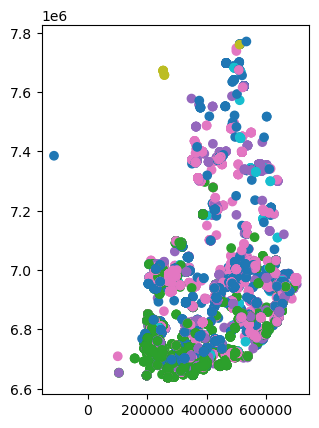

In [11]:
import matplotlib.pyplot as plt

bird_data_clean.plot(column="scientific_name_interpreted")

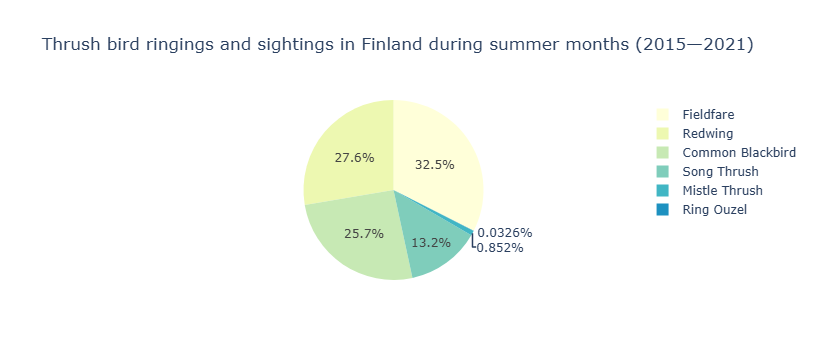

In [15]:
# pie chart
import plotly.express as px

#fig = px.pie(bird_data_clean, names="common_name_english", values="",
  #            title='Turdus species in Finland in 2024')


# Sample: count sightings per species
bird_counts = bird_data_clean['common_name_english'].value_counts().reset_index()
bird_counts.columns = ['common_name_english', 'count']

# Plot pie chart
fig = px.pie(
    bird_counts,
    names='common_name_english',
    values='count',
    title='Thrush bird ringings and sightings in Finland during summer months (2015—2021)',
    color_discrete_sequence=px.colors.sequential.YlGnBu
)

fig.show()

fig.write_html(DATA_DIRECTORY / "thrush_chart.html")

In [ ]:
# code

# plot
# a pie chart showing the different Turdus species in 2024 "observations of birds ringed in Finland 
# and reported encounters of the birds"

# Aggregate by year
#sq_data_year = sq_data.groupby('year').size().reset_index(name='Occurrences')


# Create a time series line chart to visualize the trend over the years
fig = px.pie(sq_data_year, names="", values="",
              title='Turdus species in Finland in 2024',
              labels={'year': 'Year', 'Occurrences': 'Observations'},
              color_discrete_sequence=['#B14E20'])  # Color for the line

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Observations'
)

fig.update_layout(
    plot_bgcolor='#D8D1CD',   # Plot area background
    paper_bgcolor='white',  # Entire figure background
    font=dict(
        family='Helvetica, sans-serif',
        size=16,
        color='#2B2725'
    ),
    title_font=dict(
        size=20,
        family='Helvetica',
        color='#2B2725'
    )
)

fig.write_html(DATA_DIRECTORY / "squirrel_chart.html")

# Show the figure
fig.show()



In [ ]:
# map of the most common type? Map of the amount of bird ringings? 

<Axes: >

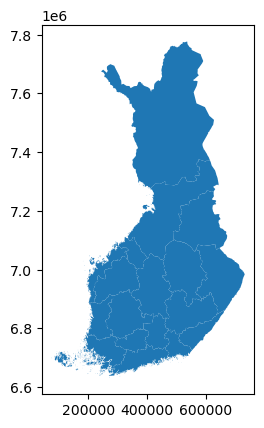

In [16]:
# code
municipal = geopandas.read_file(DATA_DIRECTORY / "maakunnat_2024_milj.shp")
municipal.plot()

<Axes: >

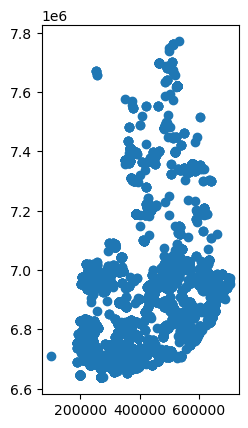

In [17]:
import numpy as np
intersection2 = bird_data_clean.overlay(municipal, how="intersection")
intersection2.plot()

In [18]:
intersection2.head()

record_id  record_order reported_name  \
0  http://tun.fi/KE.67/10388317#Unit             0        TURPIL   
1  http://tun.fi/KE.67/10388318#Unit             0        TURPIL   
2  http://tun.fi/KE.67/10388319#Unit             0        TURPIL   
3  http://tun.fi/KE.67/10394498#Unit             0        TURPIL   
4  http://tun.fi/KE.67/10394502#Unit             0        TURMER   

  scientific_name_interpreted common_name_english  date_start    date_end  \
0              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
1              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
2              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
3              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
4               Turdus merula    Common Blackbird  2015-06-08  2015-06-08   

  formatted_date_time  year      GML_ID NATCODE     NAMEFIN  \
0      2015-06-02 [8]  2015  1601210007      05  Kanta-Häme   
1     2015-06-02 [12]  2015  1601210007      05  Kanta-Häme   
2     2015-06-02 [12]  2015  1601210007      05  Kanta-Häme   
3          2015-06-02  2015  1601210001      01     Uusimaa   
4          2015-06-08  2015  1601210001      01     Uusimaa   

                NAMESWE                        geometry  
0  Egentliga Tavastland  POINT (381127.804 6783003.343)  
1  Egentliga Tavastland  POINT (381127.804 6783003.343)  
2  Egentliga Tavastland  POINT (381127.804 6783003.343)  
3                Nyland  POINT (391791.613 6671570.333)  
4                Nyland  POINT (391791.613 6671570.333)

In [19]:

# Spatial join: associate each point with its municipality
points_with_areas = geopandas.sjoin(bird_data_clean, municipal, how='left', predicate='within')

In [20]:
points_with_areas.head()

record_id  record_order reported_name  \
0  http://tun.fi/KE.67/10388317#Unit             0        TURPIL   
1  http://tun.fi/KE.67/10388318#Unit             0        TURPIL   
2  http://tun.fi/KE.67/10388319#Unit             0        TURPIL   
3  http://tun.fi/KE.67/10394498#Unit             0        TURPIL   
4  http://tun.fi/KE.67/10394499#Unit             0        TURMER   

  scientific_name_interpreted common_name_english  date_start    date_end  \
0              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
1              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
2              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
3              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
4               Turdus merula    Common Blackbird  2015-06-07  2015-06-07   

  formatted_date_time  year                        geometry  index_right  \
0      2015-06-02 [8]  2015  POINT (381127.804 6783003.343)         11.0   
1     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)         11.0   
2     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)         11.0   
3          2015-06-02  2015  POINT (391791.613 6671570.333)          0.0   
4          2015-06-07  2015  POINT (390811.648 6669742.101)          NaN   

         GML_ID NATCODE     NAMEFIN               NAMESWE  
0  1.601210e+09      05  Kanta-Häme  Egentliga Tavastland  
1  1.601210e+09      05  Kanta-Häme  Egentliga Tavastland  
2  1.601210e+09      05  Kanta-Häme  Egentliga Tavastland  
3  1.601210e+09      01     Uusimaa                Nyland  
4           NaN     NaN         NaN                   NaN

In [21]:
most_common_names = (
    points_with_areas
    .groupby('NAMEFIN')['common_name_english']
    .agg(lambda x: x.mode().iloc[0])  # Get the most common name
    .reset_index()
    .rename(columns={'common_name_english': 'most_common_name'})
)

In [22]:
municipal.head()

GML_ID NATCODE               NAMEFIN           NAMESWE  \
0  1601210001      01               Uusimaa            Nyland   
1  1601210009      06             Pirkanmaa         Birkaland   
2  1601210021      12       Pohjois-Karjala     Norra Karelen   
3  1601210033      18                Kainuu        Kajanaland   
4  1601210037      21  Ahvenanmaan maakunta  Landskapet Åland   

                                            geometry  
0  MULTIPOLYGON (((273059.511 6633517.006, 273205...  
1  POLYGON ((354164.609 6792565.666, 352746.008 6...  
2  POLYGON ((647019.938 7072707.548, 647875.536 7...  
3  POLYGON ((626655.494 7255813.466, 626655.500 7...  
4  MULTIPOLYGON (((126076.120 6667389.301, 125939...

In [23]:
gdf_mostcommon = municipal.merge(most_common_names, on='NAMEFIN', how='left')


In [24]:
gdf_mostcommon.head()

GML_ID NATCODE               NAMEFIN           NAMESWE  \
0  1601210001      01               Uusimaa            Nyland   
1  1601210009      06             Pirkanmaa         Birkaland   
2  1601210021      12       Pohjois-Karjala     Norra Karelen   
3  1601210033      18                Kainuu        Kajanaland   
4  1601210037      21  Ahvenanmaan maakunta  Landskapet Åland   

                                            geometry  most_common_name  
0  MULTIPOLYGON (((273059.511 6633517.006, 273205...  Common Blackbird  
1  POLYGON ((354164.609 6792565.666, 352746.008 6...           Redwing  
2  POLYGON ((647019.938 7072707.548, 647875.536 7...           Redwing  
3  POLYGON ((626655.494 7255813.466, 626655.500 7...           Redwing  
4  MULTIPOLYGON (((126076.120 6667389.301, 125939...         Fieldfare

In [25]:
gdf_mostcommon["most_common_name"].unique()

array(['Common Blackbird', 'Redwing', 'Fieldfare', 'Song Thrush'],
      dtype=object)

In [26]:
color_map = {
    'Common Blackbird': '#CC8B86',
    'Redwing': '#7D4F50',
    'Fieldfare': '#D1BE9C',
    'Song Thrush': '#AA998F'
}

# Create a new column with the color assigned for plotting
gdf_mostcommon['color'] = gdf_mostcommon['most_common_name'].map(color_map)

<Axes: >

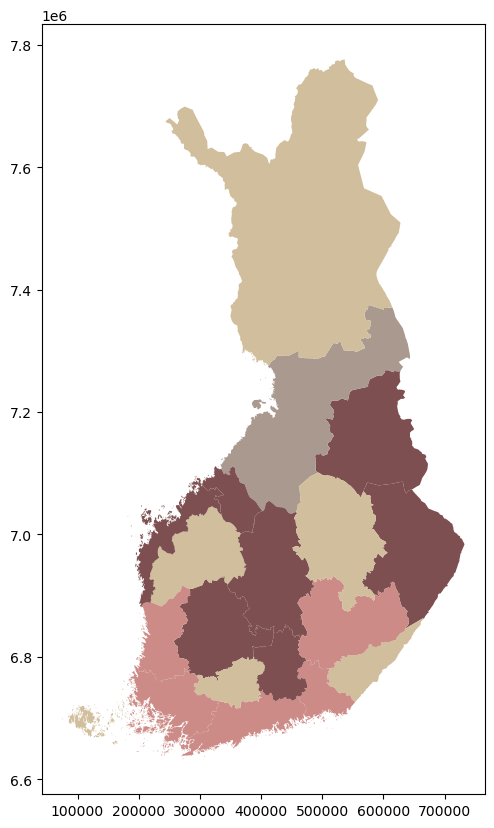

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_mostcommon.plot(color=gdf_mostcommon['color'], ax=ax)

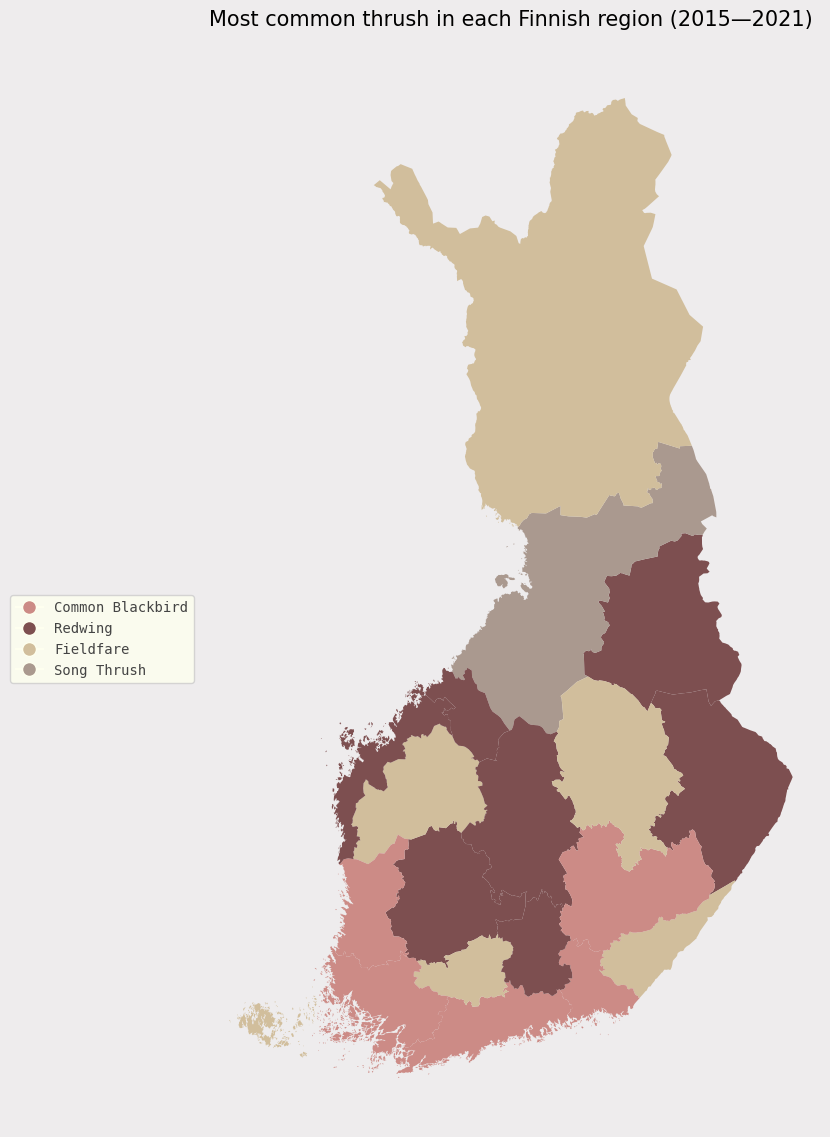

In [45]:
from matplotlib.patches import FancyArrowPatch
from matplotlib.lines import Line2D
# Start figure
fig, ax = plt.subplots(figsize=(14, 14), facecolor="#eeeced")
ax.set_facecolor("#eeeced")

gdf_mostcommon.plot(ax=ax, color=gdf_mostcommon["color"], zorder=1)

# Remove axis
ax.axis('off')

# Text and marker size
markersize = 10
fontsize = 10

# Legend
legend_elements = [Line2D([0], [0], marker='o', color="#feffef", label='Common Blackbird',
                          markerfacecolor="#CC8B86", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='Redwing',
                          markerfacecolor="#7D4F50", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='Fieldfare',
                          markerfacecolor="#D1BE9C", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='Song Thrush',
                          markerfacecolor="#AA998F", markersize=markersize)]



l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor='#feffef', framealpha=0.8,
              bbox_to_anchor=(0, 0.5), fontsize=fontsize, prop={'family': "monospace", 'size': fontsize})

for text in l.get_texts():
    text.set_color("#444444")

# set title
ax.set_title("Most common thrush in each Finnish region (2015—2021)", loc='center', fontsize=15, fontweight='book')


fig.savefig("birdmap1.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)

In [32]:
# interactive map of something

In [33]:
bird_data_clean.head()

record_id  record_order reported_name  \
0  http://tun.fi/KE.67/10388317#Unit             0        TURPIL   
1  http://tun.fi/KE.67/10388318#Unit             0        TURPIL   
2  http://tun.fi/KE.67/10388319#Unit             0        TURPIL   
3  http://tun.fi/KE.67/10394498#Unit             0        TURPIL   
4  http://tun.fi/KE.67/10394499#Unit             0        TURMER   

  scientific_name_interpreted common_name_english  date_start    date_end  \
0              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
1              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
2              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
3              Turdus pilaris           Fieldfare  2015-06-02  2015-06-02   
4               Turdus merula    Common Blackbird  2015-06-07  2015-06-07   

  formatted_date_time  year                        geometry  
0      2015-06-02 [8]  2015  POINT (381127.804 6783003.343)  
1     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)  
2     2015-06-02 [12]  2015  POINT (381127.804 6783003.343)  
3          2015-06-02  2015  POINT (391791.613 6671570.333)  
4          2015-06-07  2015  POINT (390811.648 6669742.101)

In [34]:
bird_data_clean.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
bird_data_clean = bird_data_clean.to_crs(epsg=4326)

bird_data_clean['lon'] = bird_data_clean.geometry.x
bird_data_clean['lat'] = bird_data_clean.geometry.y

In [36]:
# code

# interactive map

import pandas as pd
import folium
from folium.plugins import HeatMap


# Initialize a base map
map = folium.Map(location=[bird_data_clean['lat'].mean(), bird_data_clean['lon'].mean()], zoom_start=8)

# If we had an intensity measure (e.g., 'FIRE_INTENSITY'), we could use it here; otherwise, just use lat, lon
heat_data = [[row['lat'], row['lon']] for index, row in bird_data_clean.iterrows()]

# Add a heatmap layer
HeatMap(heat_data).add_to(map)

# Save the map to an HTML file (optional)
#map.save('html/wildfire_heatmap.html')

# Display the map
#map

In [37]:
bird_data_clean["year"].max()

2021

In [ ]:
# new column for colour based on the bird



In [39]:
bird_data_clean["common_name_english"].unique()

array(['Fieldfare', 'Common Blackbird', 'Redwing', 'Song Thrush',
       'Mistle Thrush', 'Ring Ouzel'], dtype=object)

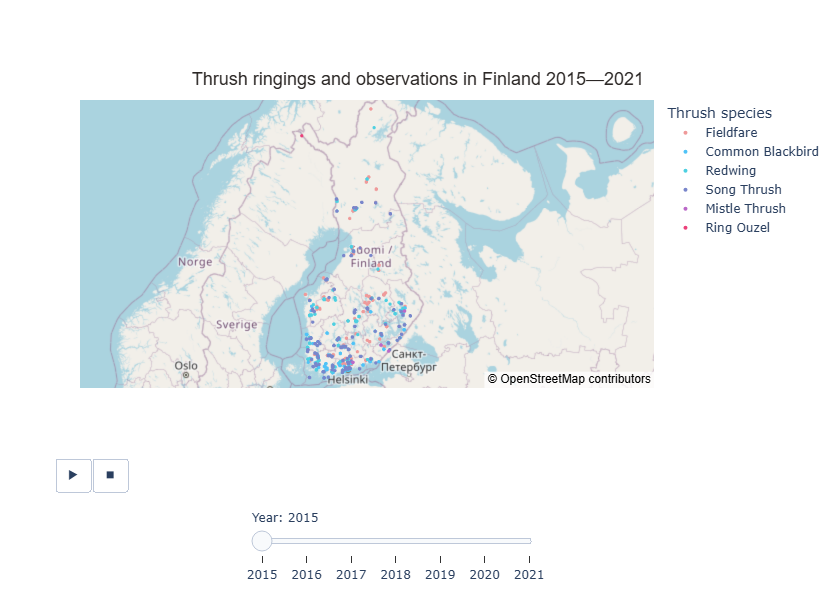

In [44]:
# how to mkae different coloured dots based on species

fig = px.scatter_mapbox(bird_data_clean,
                     lat='lat',
                     lon='lon',
                     hover_name='common_name_english',
                        hover_data=['common_name_english', 'scientific_name_interpreted', 'year'],
                        animation_frame="year",
                        color_discrete_sequence=['red'],
                        title="mep",
                        mapbox_style="open-street-map",
                        zoom=3,
                        color="common_name_english",
                        color_discrete_map={"Fieldfare" : "#ef9a9a", "Common Blackbird": "#4fc3f7", 
                                            "Redwing": "#4dd0e1", 
                                            "Song Thrush": "#7986cb", 
                                            "Mistle Thrush": "#ba68c8", "Ring Ouzel": "#ec407a"},
                        center={"lat": 65.229, "lon": 26.672},
                     width=800,
                     height=600)

#ef9a9a
#4fc3f7
#4dd0e1
#7986cb
#ba68c8
#ec407a

# Make dots smaller
fig.update_traces(marker=dict(size=4))


# Customize slider
fig.update_layout(
    title_font=dict(
        size=18,
        family='Helvetica',
        color='#2B2725'
    ),
    sliders=[dict(
        currentvalue={"prefix": "Year: "},
        len=0.5,
        x=0.3,
        y=-0.2,
    )],
    title={
        'text': "Thrush ringings and observations in Finland 2015—2021",
        'y': 0.88,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.update_layout(legend_title_text='Thrush species')

#fig = px.scatter_geo(sq_data2, lat="latitude", lon="longitude",     color="year",
#                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15)


fig.write_html(DATA_DIRECTORY / "thrushmap_interactive.html")
fig.show()